In [299]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

In [300]:
# %%
# Load the data

if '__file__' in globals():
    filepath = Path(__file__).parent
else:
    filepath = Path(r'./')

filepath = filepath / 'TOTAL_KSI_6386614326836635957.csv'
df_ksi = pd.read_csv(filepath)

In [301]:
pd.set_option('display.max_columns', None)

df_ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND           189

In [238]:
df_ksi.describe()

,OBJECTID,INDEX,ACCNUM,TIME,LATITUDE,LONGITUDE,FATAL_NO,x,y
count,18957.000000,1.895700e+04,1.402700e+04,18957.000000,18957.000000,18957.000000,870.000000,18957.000000,1.895700e+04
mean,9479.000000,3.994181e+07,5.576714e+08,1364.956428,43.710299,-79.396490,28.752874,629181.568576,4.840951e+06
std,5472.558862,3.749731e+07,1.180026e+09,631.310388,0.056294,0.104484,17.657001,8364.337712,6.324585e+03
min,1.000000,3.363207e+06,2.530100e+04,0.000000,43.589678,-79.638390,1.000000,609625.702600,4.827328e+06
25%,4740.000000,5.408154e+06,1.034561e+06,924.000000,43.661727,-79.471469,14.000000,623177.000800,4.835532e+06
50%,9479.000000,7.820656e+06,1.220029e+06,1450.000000,43.702346,-79.397388,27.500000,629199.077800,4.840070e+06
75%,14218.000000,8.092292e+07,1.386958e+06,1852.000000,43.755945,-79.318286,42.000000,635424.041900,4.846036e+06
max,18957.000000,8.180752e+07,4.008024e+09,2359.000000,43.855445,-79.122974,78.000000,651024.087800,4.857444e+06


In [239]:
# Number of null in the dataset
df_ksi.isnull().sum()

OBJECTID                 0
INDEX                    0
ACCNUM                4930
DATE                     0
TIME                     0
STREET1                  0
STREET2               1706
OFFSET               15137
ROAD_CLASS             486
DISTRICT               229
LATITUDE                 0
LONGITUDE                0
ACCLOC                5456
TRAFFCTL                75
VISIBILITY              24
LIGHT                    4
RDSFCOND                29
ACCLASS                  1
IMPACTYPE               27
INVTYPE                 16
INVAGE                   0
INJURY                8897
FATAL_NO             18087
INITDIR               5277
VEHTYPE               3487
MANOEUVER             7953
DRIVACT               9289
DRIVCOND              9291
PEDTYPE              15728
PEDACT               15730
PEDCOND              15711
CYCLISTYPE           18152
CYCACT               18155
CYCCOND              18157
PEDESTRIAN           11269
CYCLIST              16971
AUTOMOBILE            1727
M

In [240]:
df_ksi.isnull().sum().sort_values(ascending=False)

EMERG_VEH            18908
DISABILITY           18464
CYCCOND              18157
CYCACT               18155
CYCLISTYPE           18152
ALCOHOL              18149
FATAL_NO             18087
TRSN_CITY_VEH        17809
TRUCK                17788
REDLIGHT             17380
MOTORCYCLE           17273
CYCLIST              16971
SPEEDING             16263
PEDACT               15730
PEDTYPE              15728
PEDCOND              15711
OFFSET               15137
PASSENGER            11774
PEDESTRIAN           11269
DRIVCOND              9291
DRIVACT               9289
AG_DRIV               9121
INJURY                8897
MANOEUVER             7953
ACCLOC                5456
INITDIR               5277
ACCNUM                4930
VEHTYPE               3487
AUTOMOBILE            1727
STREET2               1706
ROAD_CLASS             486
DISTRICT               229
TRAFFCTL                75
RDSFCOND                29
IMPACTYPE               27
VISIBILITY              24
INVTYPE                 16
L

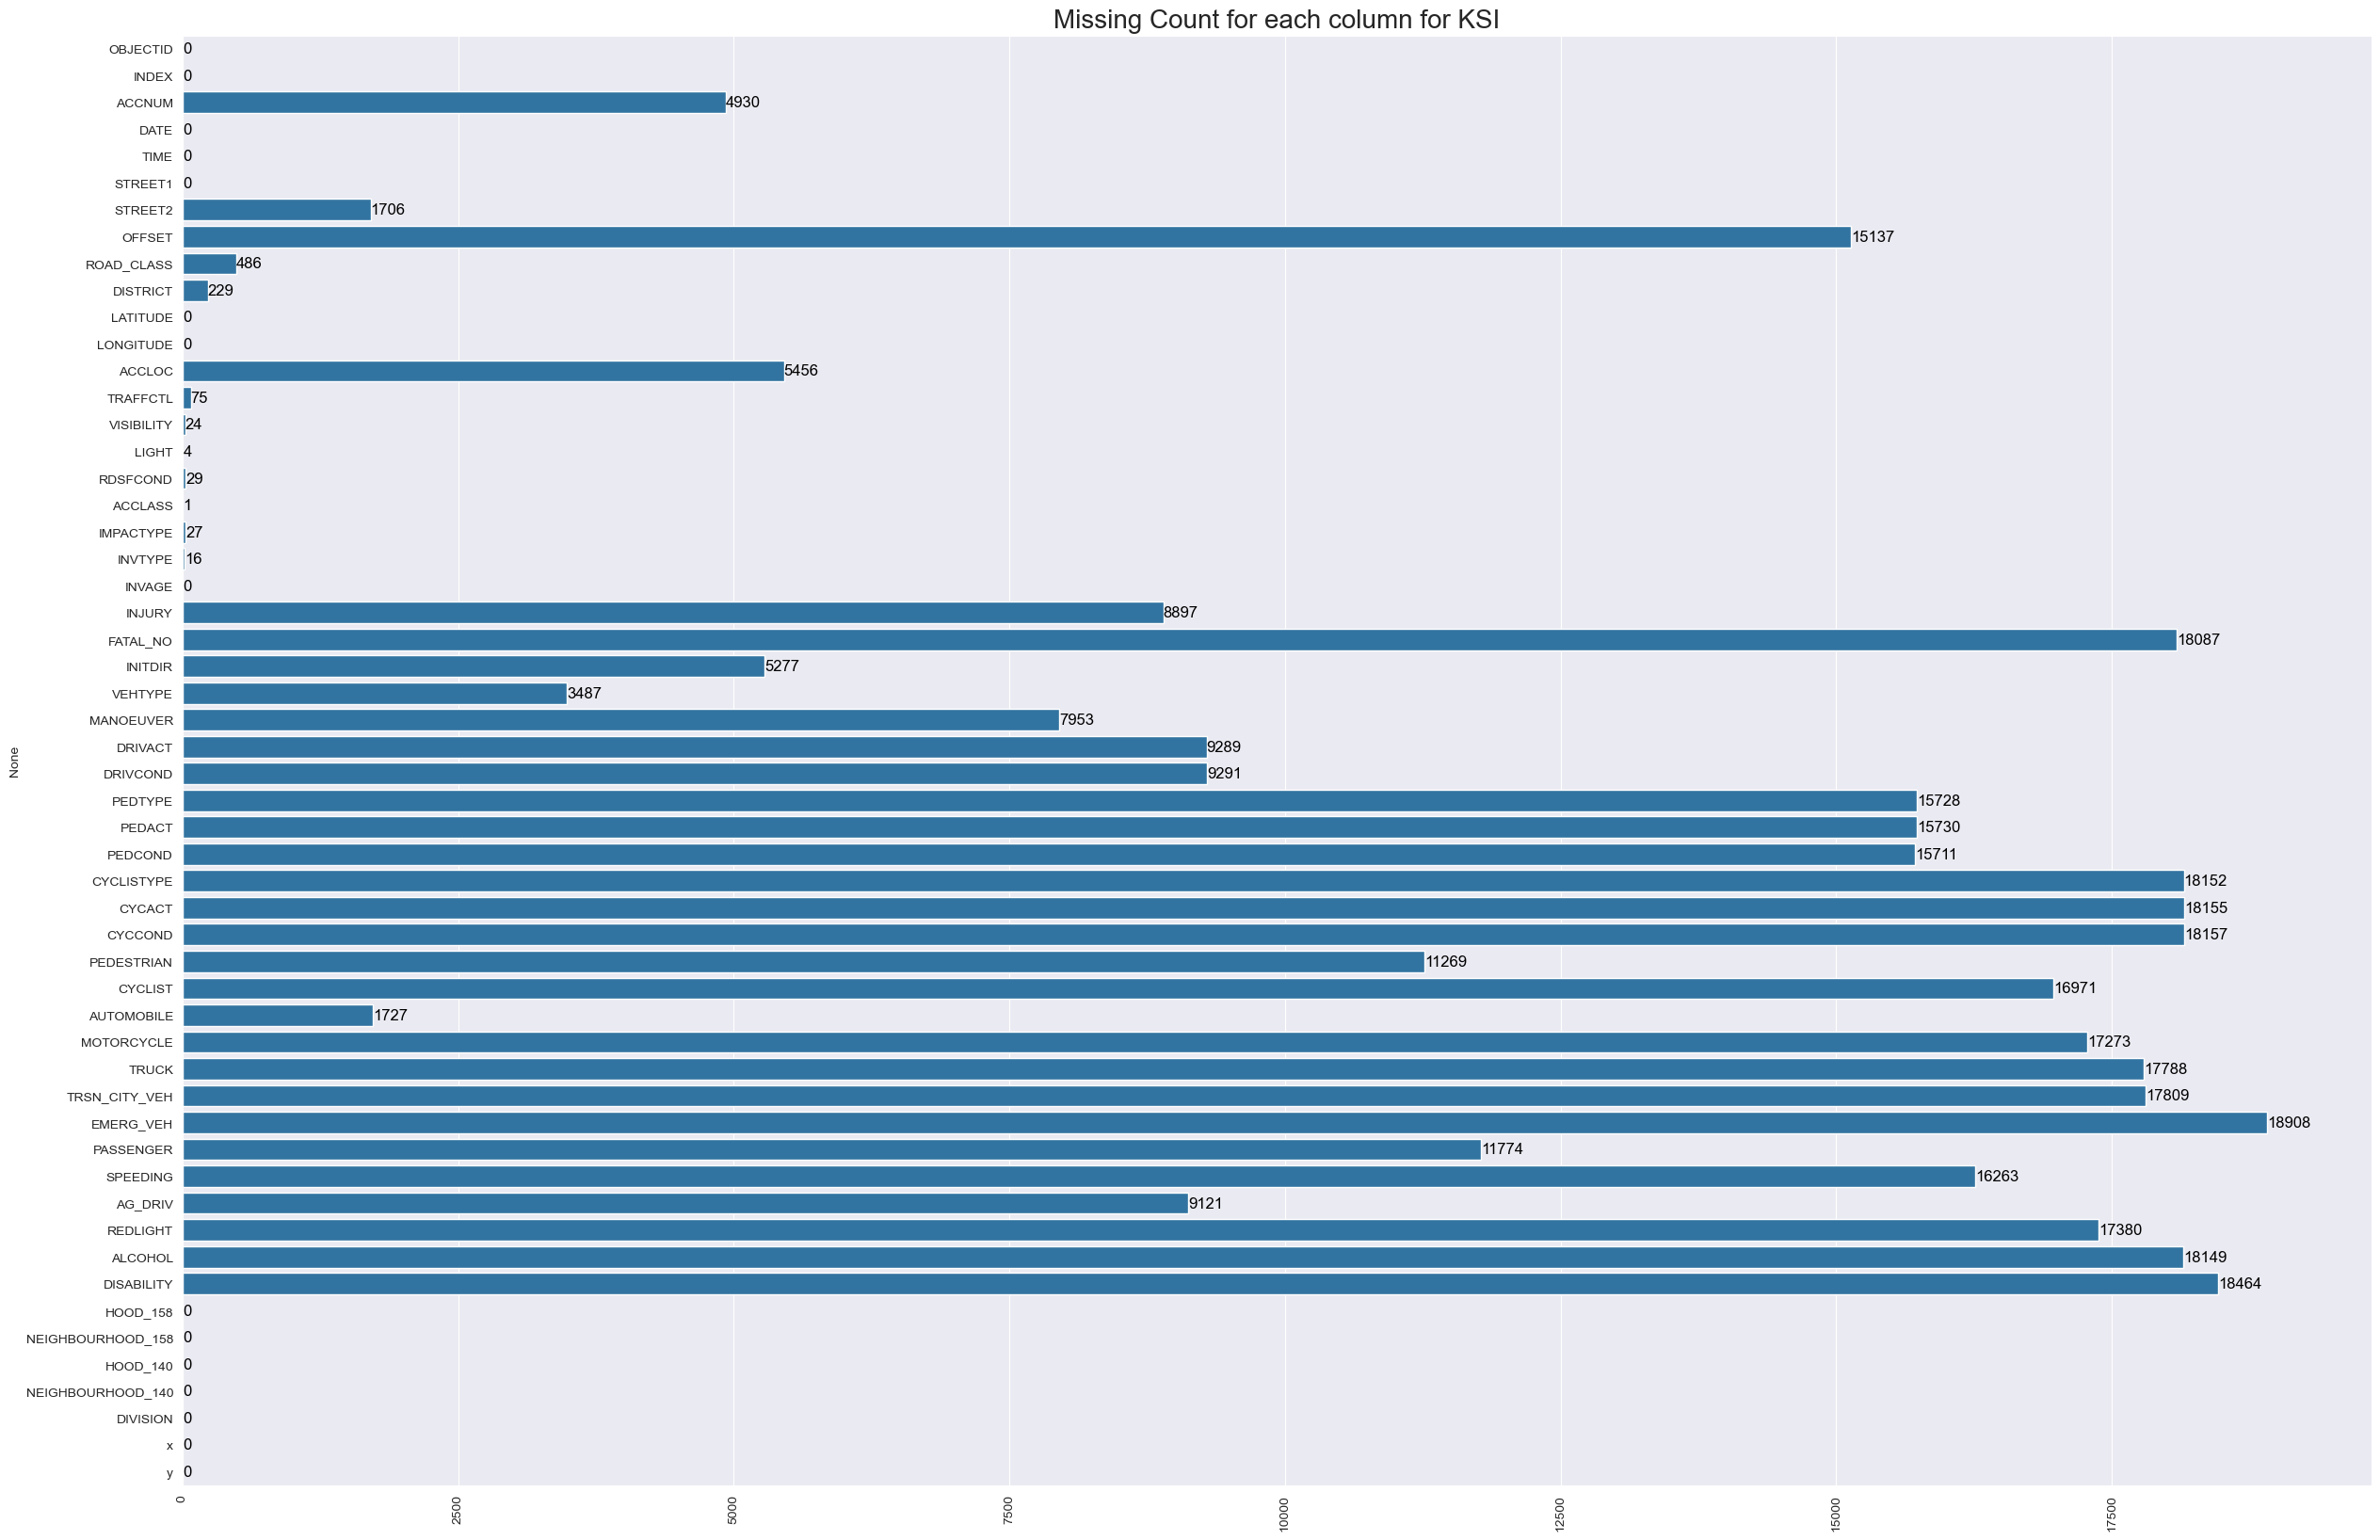

In [241]:
# Number of null in the dataset shown in plot
# null_count = df_ksi.isnull().sum().sort_values(ascending=True)
null_count = df_ksi.isnull().sum()
plt.figure(figsize = (30,20))
barplot = sns.barplot(y=null_count.index, x=null_count.values, orient = 'h')
for p in barplot.patches:
    barplot.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
            f'{p.get_width():0.0f}',
            va='center', ha='left', color='black', fontsize=12)
plt.xticks(rotation = 90)
plt.title('Missing Count for each column for KSI', fontsize = 20)
plt.savefig('null_count.png')
plt.show()

In [242]:
# Take a peek at the data
df_ksi.sample(5)

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
15006,15007,80972244,NaN,9/28/2018 8:00:00 AM,1723,AVENUE RD,FARNHAM AVE,4 m West of,Major Arterial,Toronto and East York,43.683455,-79.400165,At Intersection,Stop Sign,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Driver,25 to 29,Minor,NaN,North,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,97,Yonge-St.Clair,97,Yonge-St.Clair (97),D53,628946.3956,4.837958e+06
18233,18234,81688809,2.002447e+09,12/15/2022 10:00:00 AM,1134,MAITLAND PL,HOMEWOOD AVE,NaN,Collector,Toronto and East York,43.665648,-79.375507,At Intersection,No Control,Freezing Rain,Daylight,Wet,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,unknown,Minor,NaN,Unknown,NaN,NaN,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,Other,Other,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,71,Cabbagetown-South St.James Town,71,Cabbagetown-South St.James Town (71),D51,630972.5787,4.836019e+06
10789,10790,80164630,4.008024e+09,6/19/2014 8:00:00 AM,1600,STEELES AVE W,SHALE GT,NaN,Major Arterial,North York,43.783209,-79.487293,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,55 to 59,Major,NaN,North,Bicycle,Going Ahead,NaN,NaN,NaN,NaN,NaN,Motorist turning right on red at signalized in...,Driving Properly,Normal,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,27,York University Heights,27,York University Heights (27),D31,621721.5737,4.848906e+06
6990,6991,6804668,1.242543e+06,5/20/2011 8:00:00 AM,1819,DAVENPORT RD,FOUNDRY AVE,NaN,Minor Arterial,Toronto and East York,43.671345,-79.449390,NaN,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,15 to 19,NaN,NaN,West,"Automobile, Station Wagon",Going Ahead,Failed to Yield Right of Way,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,171,Junction-Wallace Emerson,93,Dovercourt-Wallace Emerson-Junction (93),D13,625003.9760,4.836538e+06
5258,5259,5808431,1.136272e+06,11/12/2009 10:00:00 AM,1759,BIRCHMOUNT RD,ROLARK DR,NaN,Major Arterial,Scarborough,43.767645,-79.292290,NaN,No Control,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,Driver,35 to 39,NaN,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119,Wexford/Maryvale,119,Wexford/Maryvale (119),D41,637448.5062,4.847482e+06


In [243]:
df_ksi.head(5)

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,1,3389067,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,50 to 54,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
1,2,3389068,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,15 to 19,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
2,3,3389069,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Driver,55 to 59,Minor,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
3,4,3389070,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,20 to 24,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
4,5,3389071,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,15 to 19,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06


In [244]:
df_ksi.tail(5)

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
18952,18953,81755037,3.002957e+09,12/26/2023 10:00:00 AM,2008,MCCOWAN RD,ELLESMERE RD,NaN,Major Arterial,NaN,43.772151,-79.251460,Intersection Related,Traffic Signal,"Fog, Mist, Smoke, Dust","Dark, artificial",Wet,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,20 to 24,Major,NaN,NaN,NaN,NaN,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,142,Woburn North,137,Woburn (137),D43,640724.2608,4.848051e+06
18953,18954,81754165,3.002971e+09,12/28/2023 10:00:00 AM,1911,DUFFERIN ST,FISHER ST,NaN,Minor Arterial,Toronto and East York,43.650847,-79.431903,Intersection Related,No Control,Rain,Dark,Wet,Fatal,Pedestrian Collisions,Pedestrian,80 to 84,Fatal,45.0,East,NaN,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,Little Portugal,84,Little Portugal (84),D14,626456.7479,4.834288e+06
18954,18955,81754166,3.002971e+09,12/28/2023 10:00:00 AM,1911,DUFFERIN ST,FISHER ST,NaN,Minor Arterial,Toronto and East York,43.650847,-79.431903,Intersection Related,No Control,Rain,Dark,Wet,Fatal,Pedestrian Collisions,Driver,20 to 24,NaN,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,Little Portugal,84,Little Portugal (84),D14,626456.7479,4.834288e+06
18955,18956,81755104,3.002978e+09,12/29/2023 10:00:00 AM,1829,DONSIDE DR,MAYBOURNE AV,NaN,Local,Scarborough,43.700789,-79.290279,Intersection Related,No Control,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,Driver,65 to 69,NaN,NaN,West,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,Clairlea-Birchmount,120,Clairlea-Birchmount (120),D41,637763.5905,4.840060e+06
18956,18957,81755105,3.002978e+09,12/29/2023 10:00:00 AM,1829,DONSIDE DR,MAYBOURNE AV,NaN,Local,Scarborough,43.700789,-79.290279,Intersection Related,No Control,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,15 to 19,Major,NaN,NaN,NaN,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,"Crossing, no Traffic Control",Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,Clairlea-Birchmount,120,Clairlea-Birchmount (120),D41,637763.5905,4.840060e+06


In [245]:
# Look at the Target Class
acclass_count = df_ksi['ACCLASS'].value_counts(dropna=False)
acclass_pct = df_ksi['ACCLASS'].value_counts(normalize=True, dropna=False) * 100

acclass_counts_pct = pd.DataFrame({'Count': acclass_count, 'Pct %': acclass_pct})
acclass_counts_pct

,Count,Pct %
ACCLASS,,
Non-Fatal Injury,16268,85.815266
Fatal,2670,14.084507
Property Damage O,18,0.094952
NaN,1,0.005275


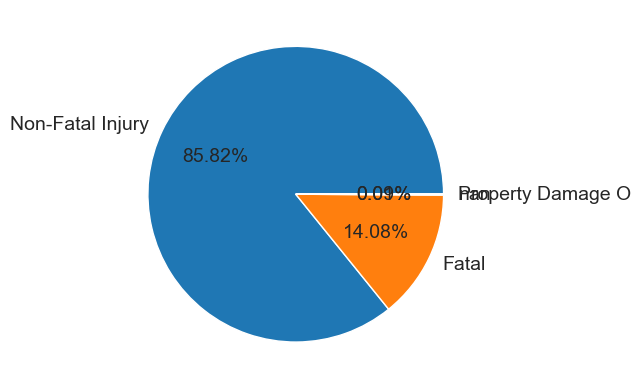

In [246]:
plt.pie(acclass_counts_pct.Count.values, labels=acclass_counts_pct.index, autopct='%1.2f%%', textprops={'fontsize': 14})
plt.show()

In [247]:
# Check the number of unique values per column / feature with NaN included
df_ksi.nunique(dropna=False)
df_ksi.nunique(dropna=False).sort_values(ascending=True)



CYCLIST                  2
AUTOMOBILE               2
DISABILITY               2
ALCOHOL                  2
REDLIGHT                 2
AG_DRIV                  2
SPEEDING                 2
PASSENGER                2
MOTORCYCLE               2
TRUCK                    2
EMERG_VEH                2
TRSN_CITY_VEH            2
PEDESTRIAN               2
ACCLASS                  4
INJURY                   5
DISTRICT                 5
INITDIR                  6
VISIBILITY               9
LIGHT                   10
RDSFCOND                10
ACCLOC                  11
IMPACTYPE               11
CYCCOND                 11
TRAFFCTL                11
PEDCOND                 11
DRIVCOND                11
CYCACT                  12
ROAD_CLASS              12
DRIVACT                 14
PEDACT                  16
PEDTYPE                 17
MANOEUVER               17
DIVISION                17
INVTYPE                 20
INVAGE                  21
CYCLISTYPE              23
VEHTYPE                 33
F

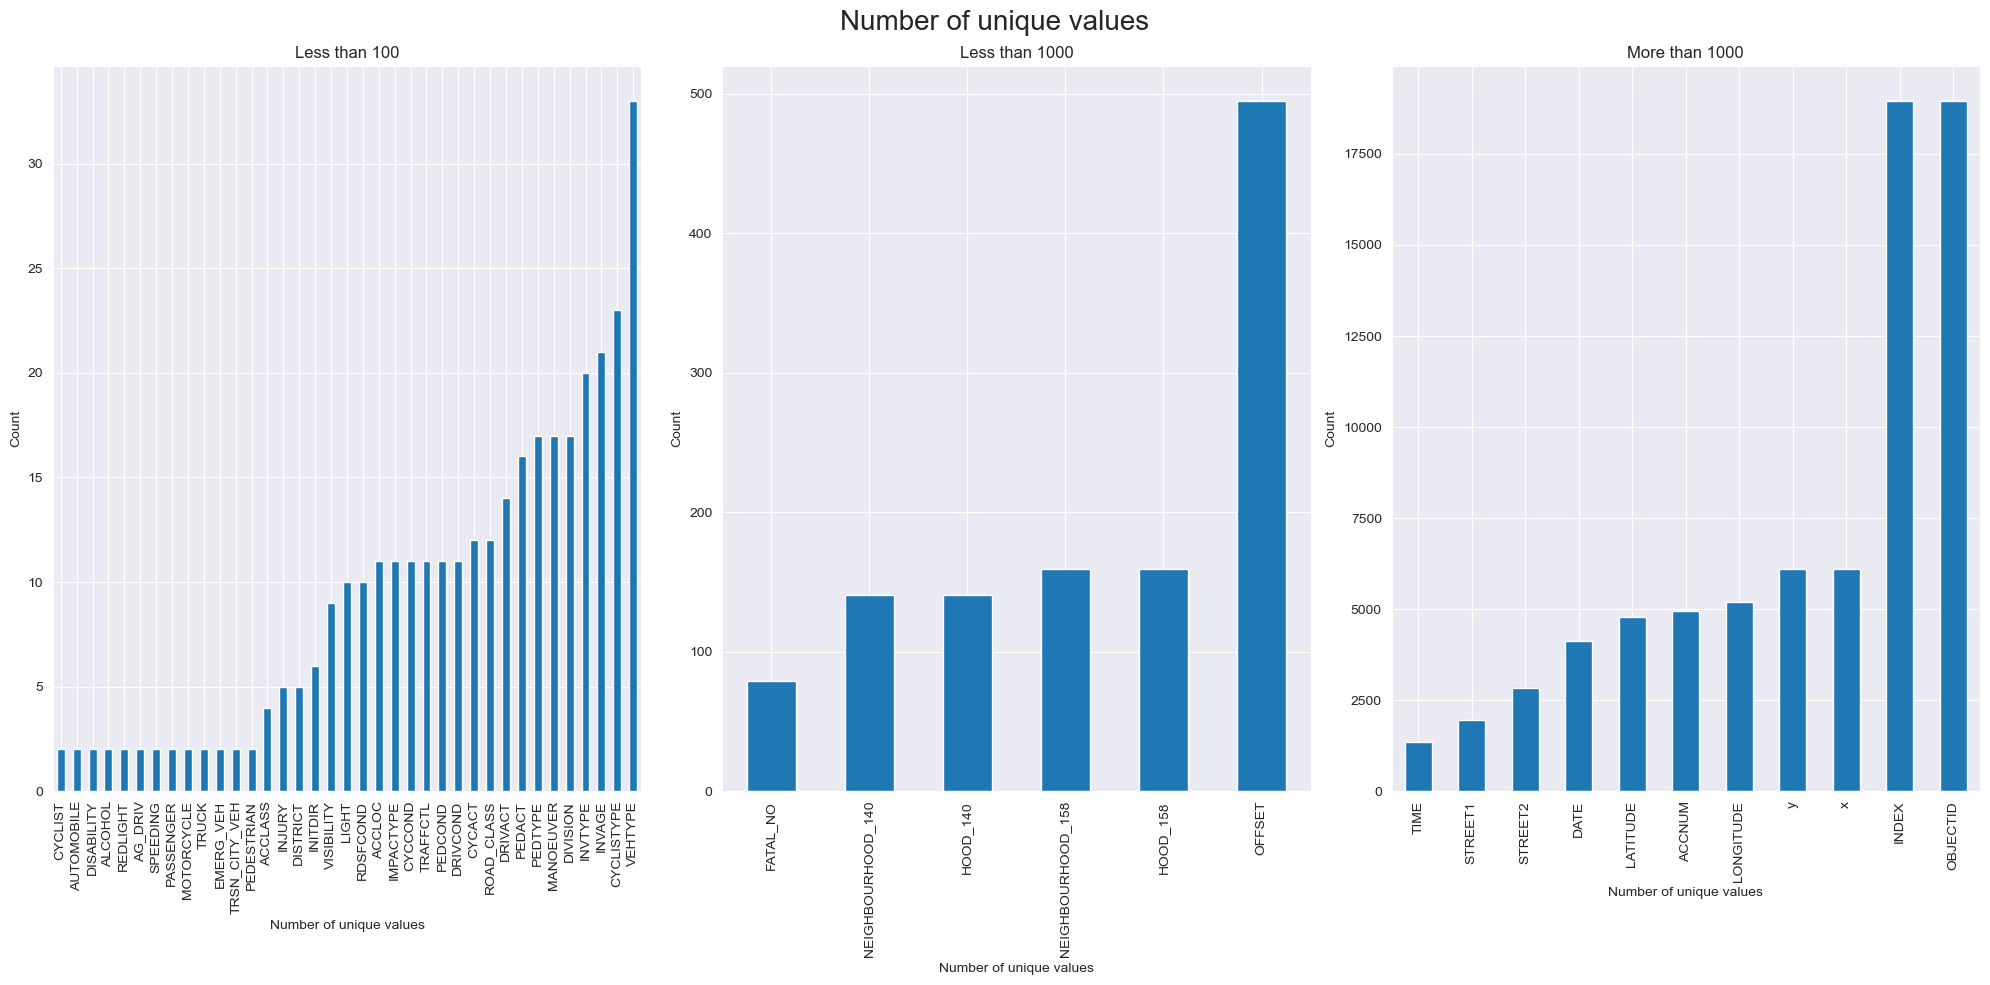

In [248]:
# Plot the number of unique values to take a look

nunique_count = df_ksi.nunique(dropna=False).sort_values(ascending=True)
# nunique_count[nunique_count < 200].plot(kind='bar')
nunique_count_50 = nunique_count[nunique_count <=50]
nunique_count_1000 = nunique_count[(nunique_count > 50) & (nunique_count <=1000)]
nunique_count_rest = nunique_count[(nunique_count > 1000) &  (nunique_count > 1000)]

fig, axe = plt.subplots(1,3, figsize = (20,10))
def nuplot(nuplot, axes,title):
    nuplot.plot(ax = axe[axes], kind = 'bar')
    axe[axes].set_xlabel('Number of unique values')
    axe[axes].set_ylabel('Count')
    axe[axes].set_title(title)
    axe[axes].set_xticklabels(nuplot.index, rotation = 90)

nuplot(nunique_count_50, 0, 'Less than 100')
nuplot(nunique_count_1000, 1, 'Less than 1000')
nuplot(nunique_count_rest, 2, 'More than 1000')

fig.suptitle('Number of unique values', fontsize = 20)
fig.tight_layout()
plt.show()

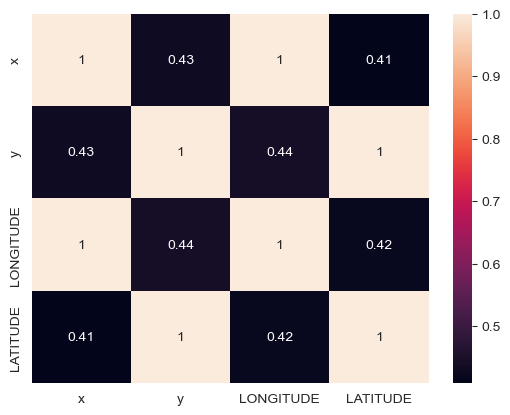

In [249]:
x_longtitude_corr = df_ksi[['x','y','LONGITUDE','LATITUDE']].corr()
# x_longtitude_corr
sns.heatmap(x_longtitude_corr, annot=True)
plt.show()

In [302]:
# Data Clean up
# Correct the date and time format
# df_ksi['DATE'] = pd.to_datetime(df_ksi['DATE'], format='%m/%d/%Y %I:%M:%S %p').dt.date # Only extract date
df_ksi['DATE'] = pd.to_datetime(df_ksi['DATE'], format='%m/%d/%Y %I:%M:%S %p').dt.normalize() # Only extract date


# Original 'TIME' column is 'int64' so 0006 is 6 which is an issue for to_datetime()
# Fix the format with leading zero with zfill()
df_ksi['TIME'] = df_ksi['TIME'].apply(lambda x: str(x).zfill(4))
df_ksi['TIME'] = pd.to_datetime(df_ksi['TIME'],format='%H%M').dt.time

df_ksi['DATETIME'] = pd.to_datetime(df_ksi['DATE'].astype(str) + ' ' + df_ksi['TIME'].astype(str))
df_ksi.drop(columns=['DATE', 'TIME'], inplace = True)
# df_ksi.dtypes

In [254]:
df_ksi.dtypes

OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                   object
DISTRICT                     object
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                       object
TRAFFCTL                     object
VISIBILITY                   object
LIGHT                        object
RDSFCOND                     object
ACCLASS                      object
IMPACTYPE                    object
INVTYPE                      object
INVAGE                       object
INJURY                       object
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                    object
DRIVACT                      object
DRIVCOND                     object
PEDTYPE                      object
PEDACT                      

In [215]:
df_ksi.head(5)

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,1,3389067,893184.0,2006-01-01,1900-01-01 02:36:00,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,50 to 54,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
1,2,3389068,893184.0,2006-01-01,1900-01-01 02:36:00,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,15 to 19,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
2,3,3389069,893184.0,2006-01-01,1900-01-01 02:36:00,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Driver,55 to 59,Minor,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
3,4,3389070,893184.0,2006-01-01,1900-01-01 02:36:00,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,20 to 24,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
4,5,3389071,893184.0,2006-01-01,1900-01-01 02:36:00,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,15 to 19,Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06


In [303]:
# Impute the empty ACCNUM

# df_ksi[['DATE','TIME','LONGITUDE','LATITUDE']].astype(str).agg('_'.join, axis = 1)
# date_time_long_lat = df_ksi['DATE'].astype(str) + '_' + df_ksi['TIME'].dt.strftime('%H%M') + '_' + df_ksi['LONGITUDE'].astype(str) + '_' + df_ksi['LATITUDE'].astype(str)

datetime_long_lat = df_ksi[['DATETIME','LONGITUDE','LATITUDE']].astype(str).agg('_'.join, axis = 1)
df_ksi['ACCNUM'] = df_ksi['ACCNUM'].fillna(datetime_long_lat)


In [256]:
df_ksi['ACCNUM'].isnull().sum()

0

In [258]:
# 'ACCLASS' to be cleaned up
df_ksi['ACCLASS'].unique()
df_ksi['ACCLASS'].value_counts(dropna=False)
df_ksi[df_ksi['ACCLASS'].isnull()]

,OBJECTID,INDEX,ACCNUM,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y,DATETIME
18553,18554,81745927,3001623085.0,SPADINA RD,SILVERWOOD AVE,NaN,Minor Arterial,Toronto and East York,43.695891,-79.415691,At Intersection,No Control,Clear,"Daylight, artificial",Dry,NaN,SMV Other,Driver,70 to 74,Fatal,21.0,South,"Automobile, Station Wagon",Going Ahead,Exceeding Speed Limit,Medical or Physical Disability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Yes,101,Forest Hill South,101,Forest Hill South (101),D53,627668.6029,4.839316e+06,2023-07-12 19:57:00


In [259]:
df_ksi['ACCLASS'] = df_ksi['ACCLASS'].fillna(df_ksi['INJURY'])  # Using the INJURY to impute the NaN in ACCLASS

In [260]:
df_ksi.iloc[18553] # The original row where ACCLASS is null.

OBJECTID                                      18554
INDEX                                      81745927
ACCNUM                                 3001623085.0
STREET1                                  SPADINA RD
STREET2                              SILVERWOOD AVE
OFFSET                                          NaN
ROAD_CLASS                           Minor Arterial
DISTRICT                      Toronto and East York
LATITUDE                                  43.695891
LONGITUDE                                -79.415691
ACCLOC                              At Intersection
TRAFFCTL                                 No Control
VISIBILITY                                    Clear
LIGHT                          Daylight, artificial
RDSFCOND                                        Dry
ACCLASS                                       Fatal
IMPACTYPE                                 SMV Other
INVTYPE                                      Driver
INVAGE                                     70 to 74
INJURY      

In [261]:
df_ksi['ACCLASS'] = df_ksi['ACCLASS'].replace('Property Damage O','Non-Fatal Injury')


In [262]:
df_ksi['ACCLASS'].value_counts()

ACCLASS
Non-Fatal Injury    16286
Fatal                2671
Name: count, dtype: int64

In [263]:
df_ksi['DATETIME'].dtype

dtype('<M8[ns]')

In [304]:
# Add new components of time to the dataframe
# df_ksi.drop(['year','month','week','dayofweek','hour'], axis = 1, inplace = True)
df_ksi = df_ksi.assign(
    YEAR = df_ksi['DATETIME'].dt.year,
    MONTH = df_ksi['DATETIME'].dt.month,
    WEEK = df_ksi['DATETIME'].dt.isocalendar().week,
    DAYOFWEEK = df_ksi['DATETIME'].dt.dayofweek,
    HOUR = df_ksi['DATETIME'].dt.hour
)

In [305]:
by_year = df_ksi.groupby(['YEAR', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count')
by_year.head(5)

,YEAR,ACCLASS,Accidents Count
0,2006,Fatal,57
1,2006,Non-Fatal Injury,424
2,2007,Fatal,47
3,2007,Non-Fatal Injury,406
4,2008,Fatal,51


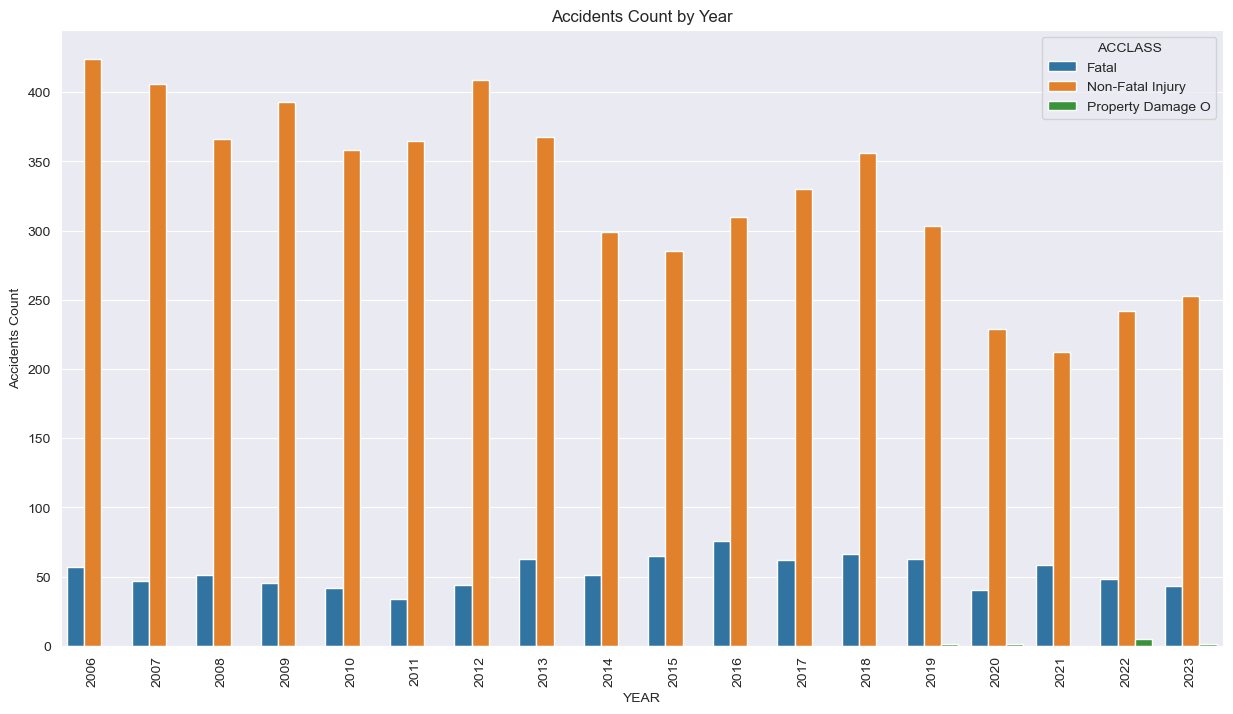

In [306]:
plt.figure(figsize = (15,8))
sns.barplot(by_year, x='YEAR', y='Accidents Count', hue='ACCLASS')
plt.title('Accidents Count by Year')
plt.xticks(rotation = 90)
plt.show()

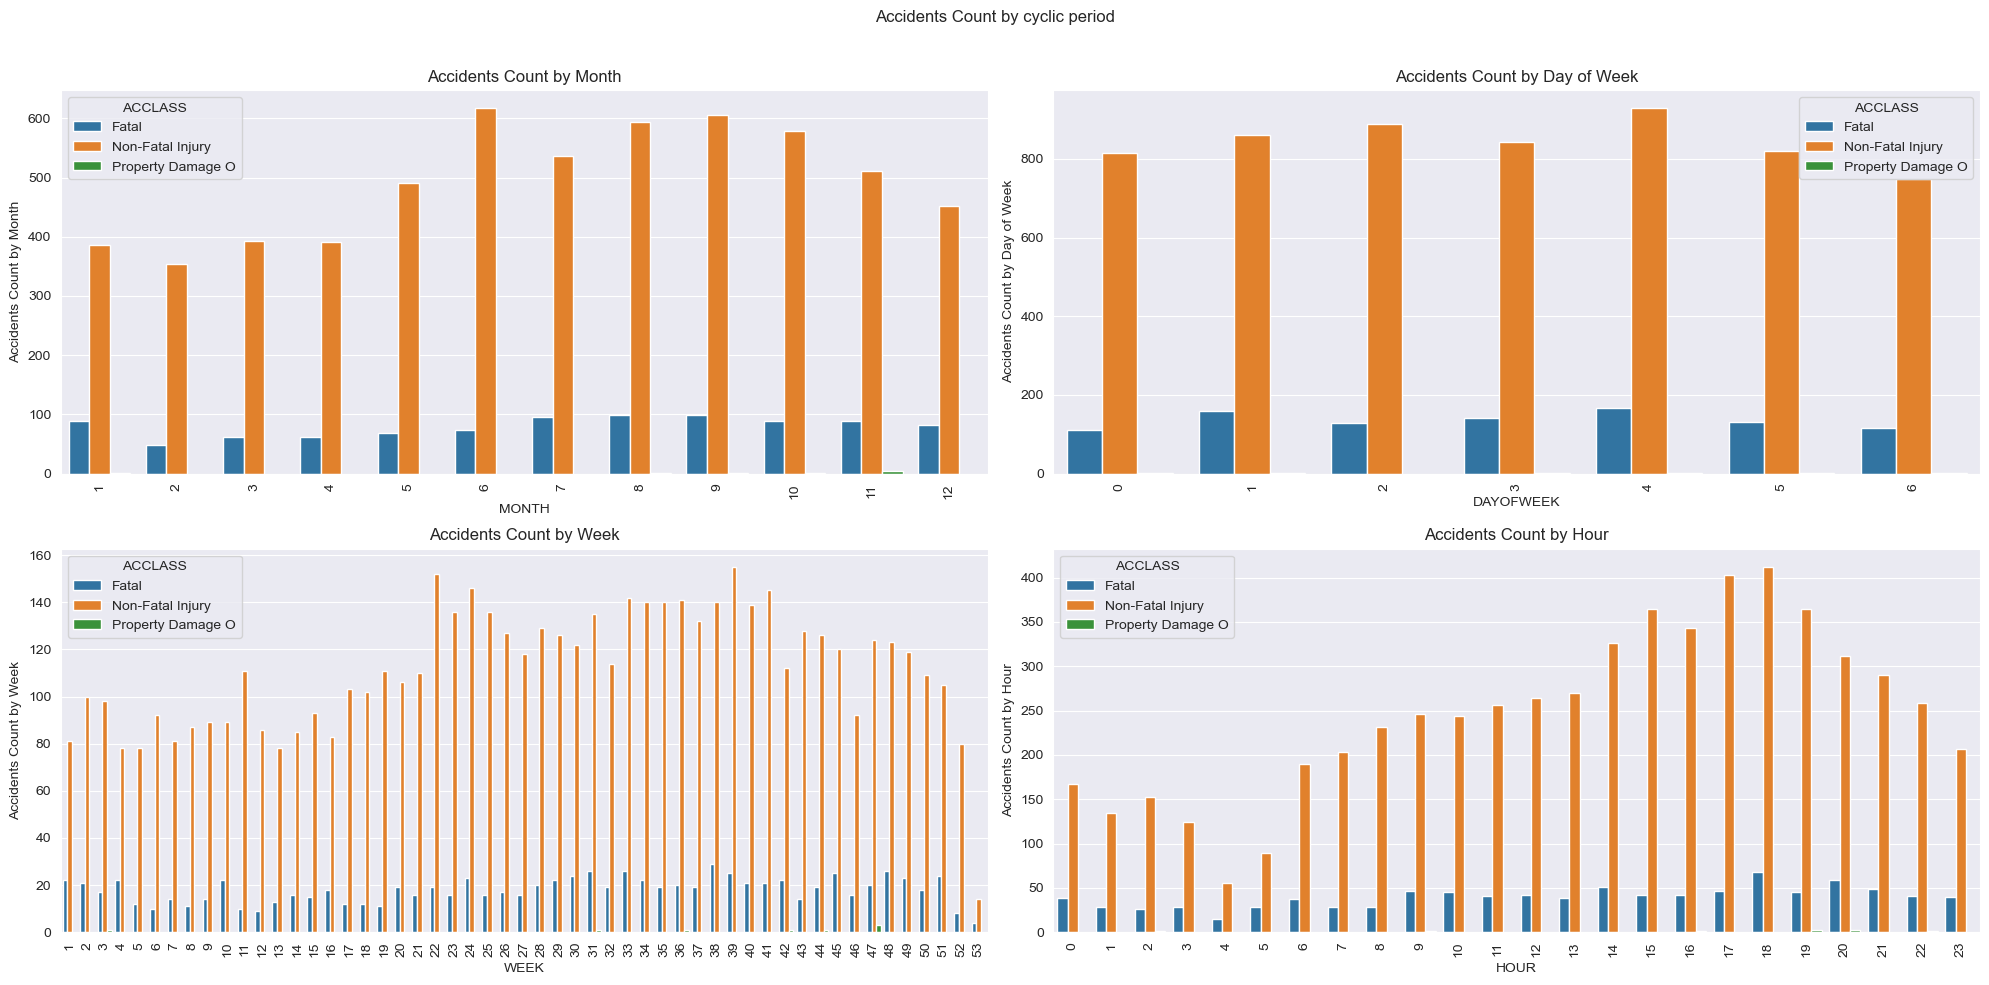

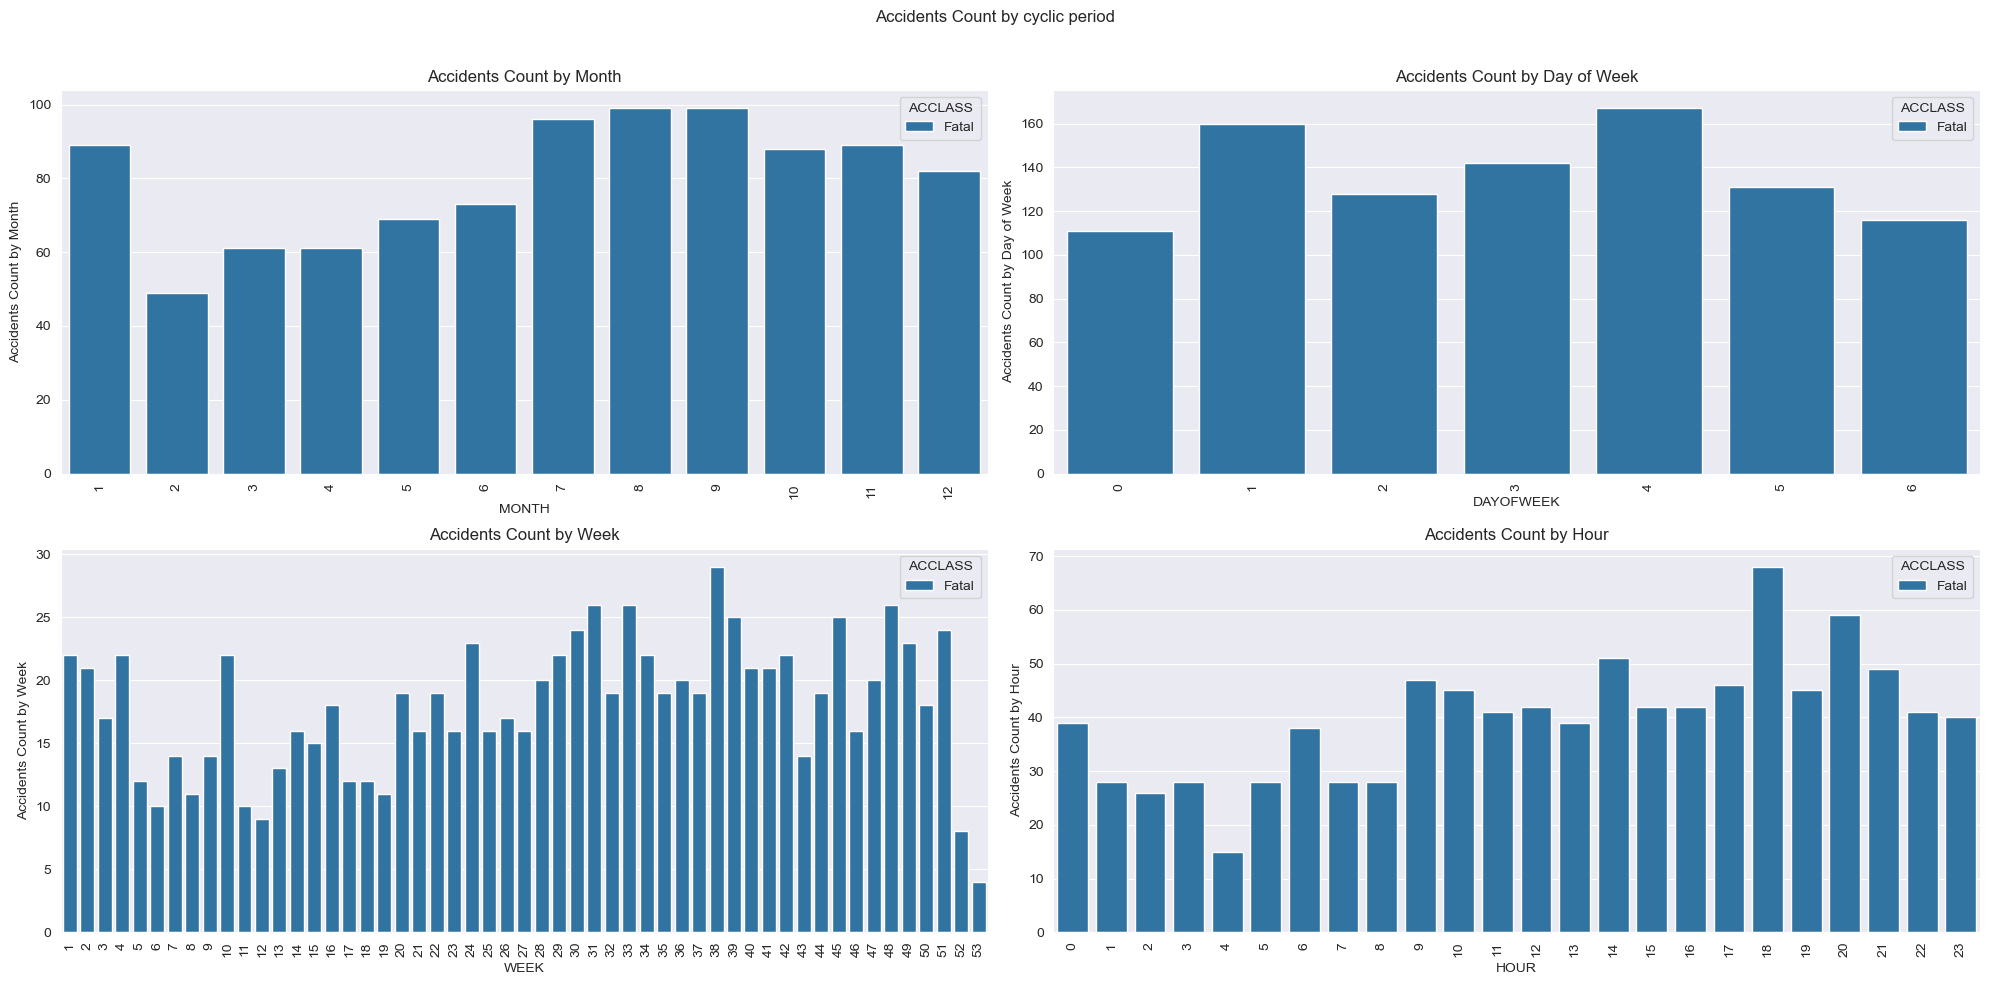

In [307]:
by_month = df_ksi.groupby(['MONTH', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Month')
by_dayofweek = df_ksi.groupby(['DAYOFWEEK', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Day of Week')
by_week = df_ksi.groupby(['WEEK', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Week')
by_hour = df_ksi.groupby(['HOUR', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Hour')

# Data and titles for each subplot
data = [by_month, by_dayofweek, by_week, by_hour]
titles = ['Accidents Count by Month', 'Accidents Count by Day of Week', 'Accidents Count by Week', 'Accidents Count by Hour']
xlabels = ['MONTH', 'DAYOFWEEK', 'WEEK', 'HOUR']
ylabels = ['Accidents Count by Month', 'Accidents Count by Day of Week', 'Accidents Count by Week', 'Accidents Count by Hour']

def plot_cycles(data, titles, xlabels, ylabels):
    fig, axes = plt.subplots(2,2, figsize = (20,10))
    fig.suptitle('Accidents Count by cyclic period')
    for i, ax in enumerate(axes.flat):
        sns.barplot(data = data[i], ax = ax, x = xlabels[i], y = ylabels[i], hue = 'ACCLASS')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        ax.set_title(titles[i])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

filtered_fatal = 'Fatal'
by_month_filtered = by_month[by_month['ACCLASS'] == filtered_fatal]
by_dayofweek_filtered = by_dayofweek[by_dayofweek['ACCLASS'] == filtered_fatal]
by_week_filtered = by_week[by_week['ACCLASS'] == filtered_fatal]
by_hour_filtered = by_hour[by_hour['ACCLASS'] == filtered_fatal]
data_filtered = [by_month_filtered, by_dayofweek_filtered, by_week_filtered, by_hour_filtered]

plot_cycles(data, titles, xlabels, ylabels)
plot_cycles(data_filtered, titles, xlabels, ylabels)




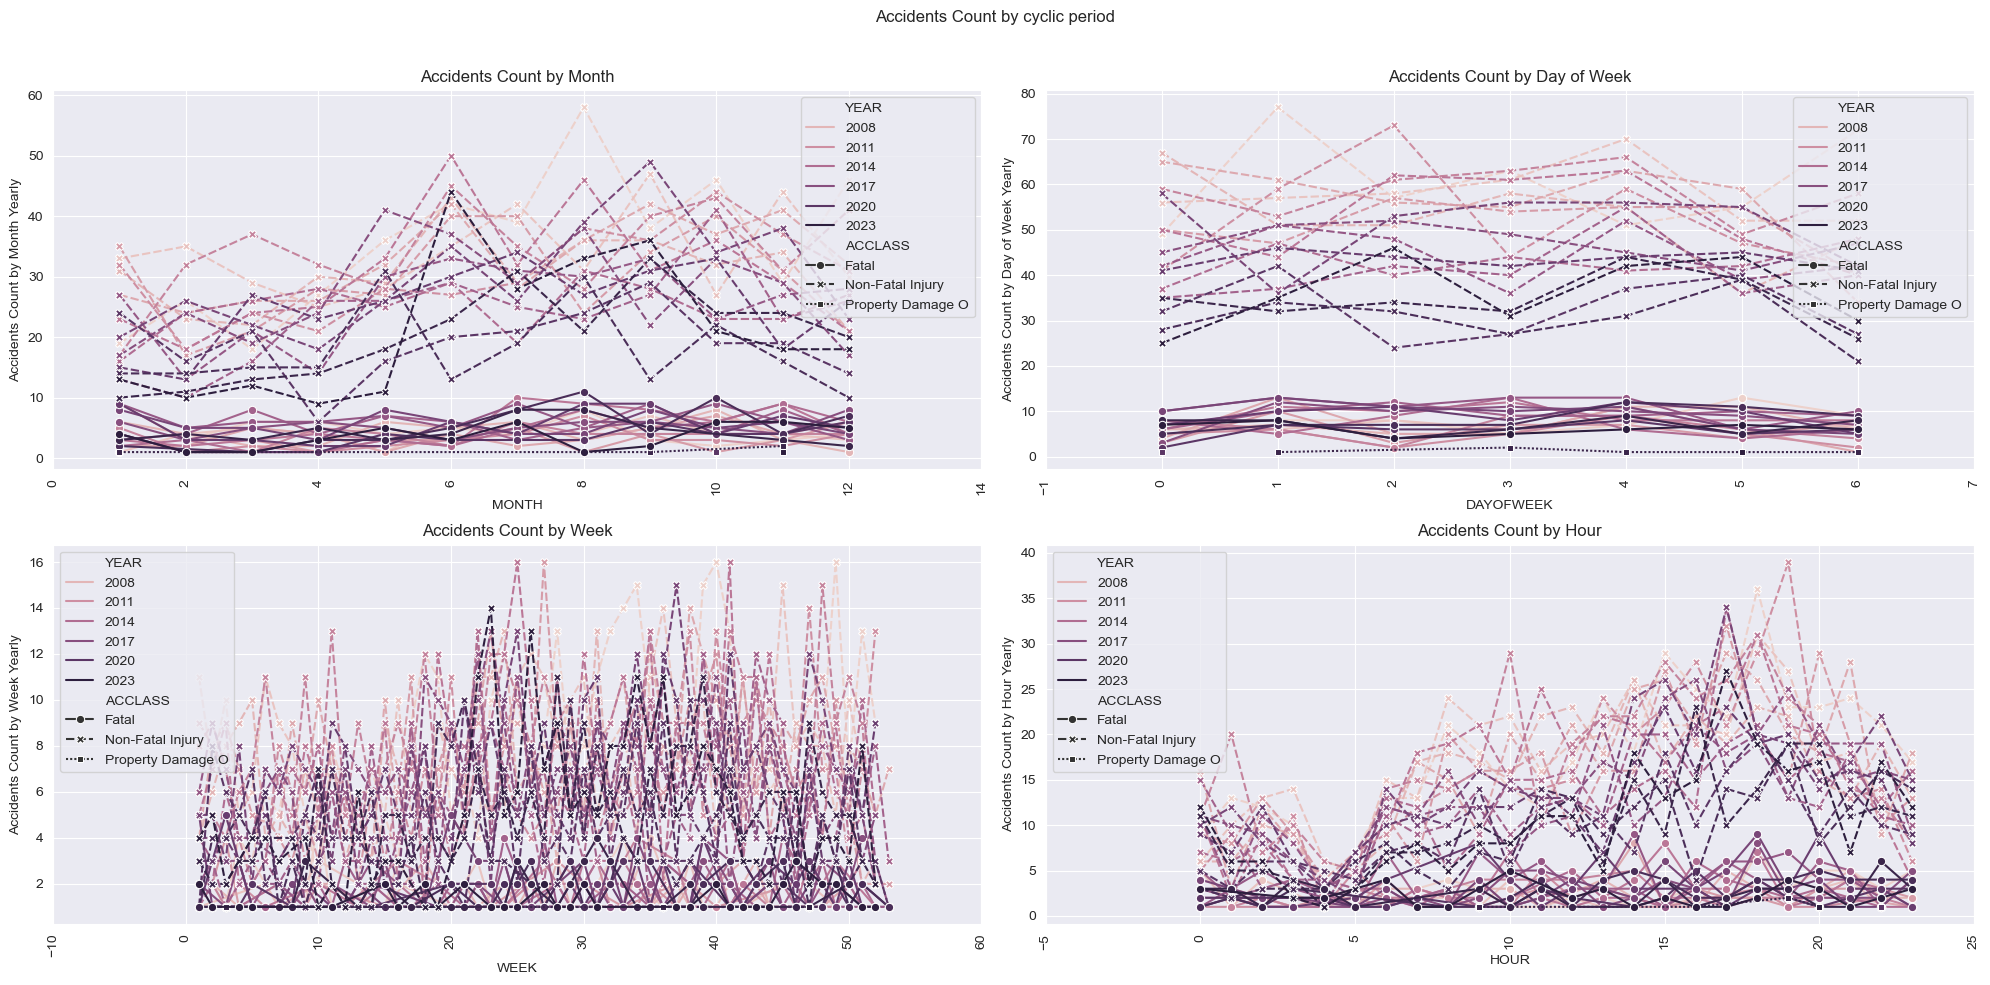

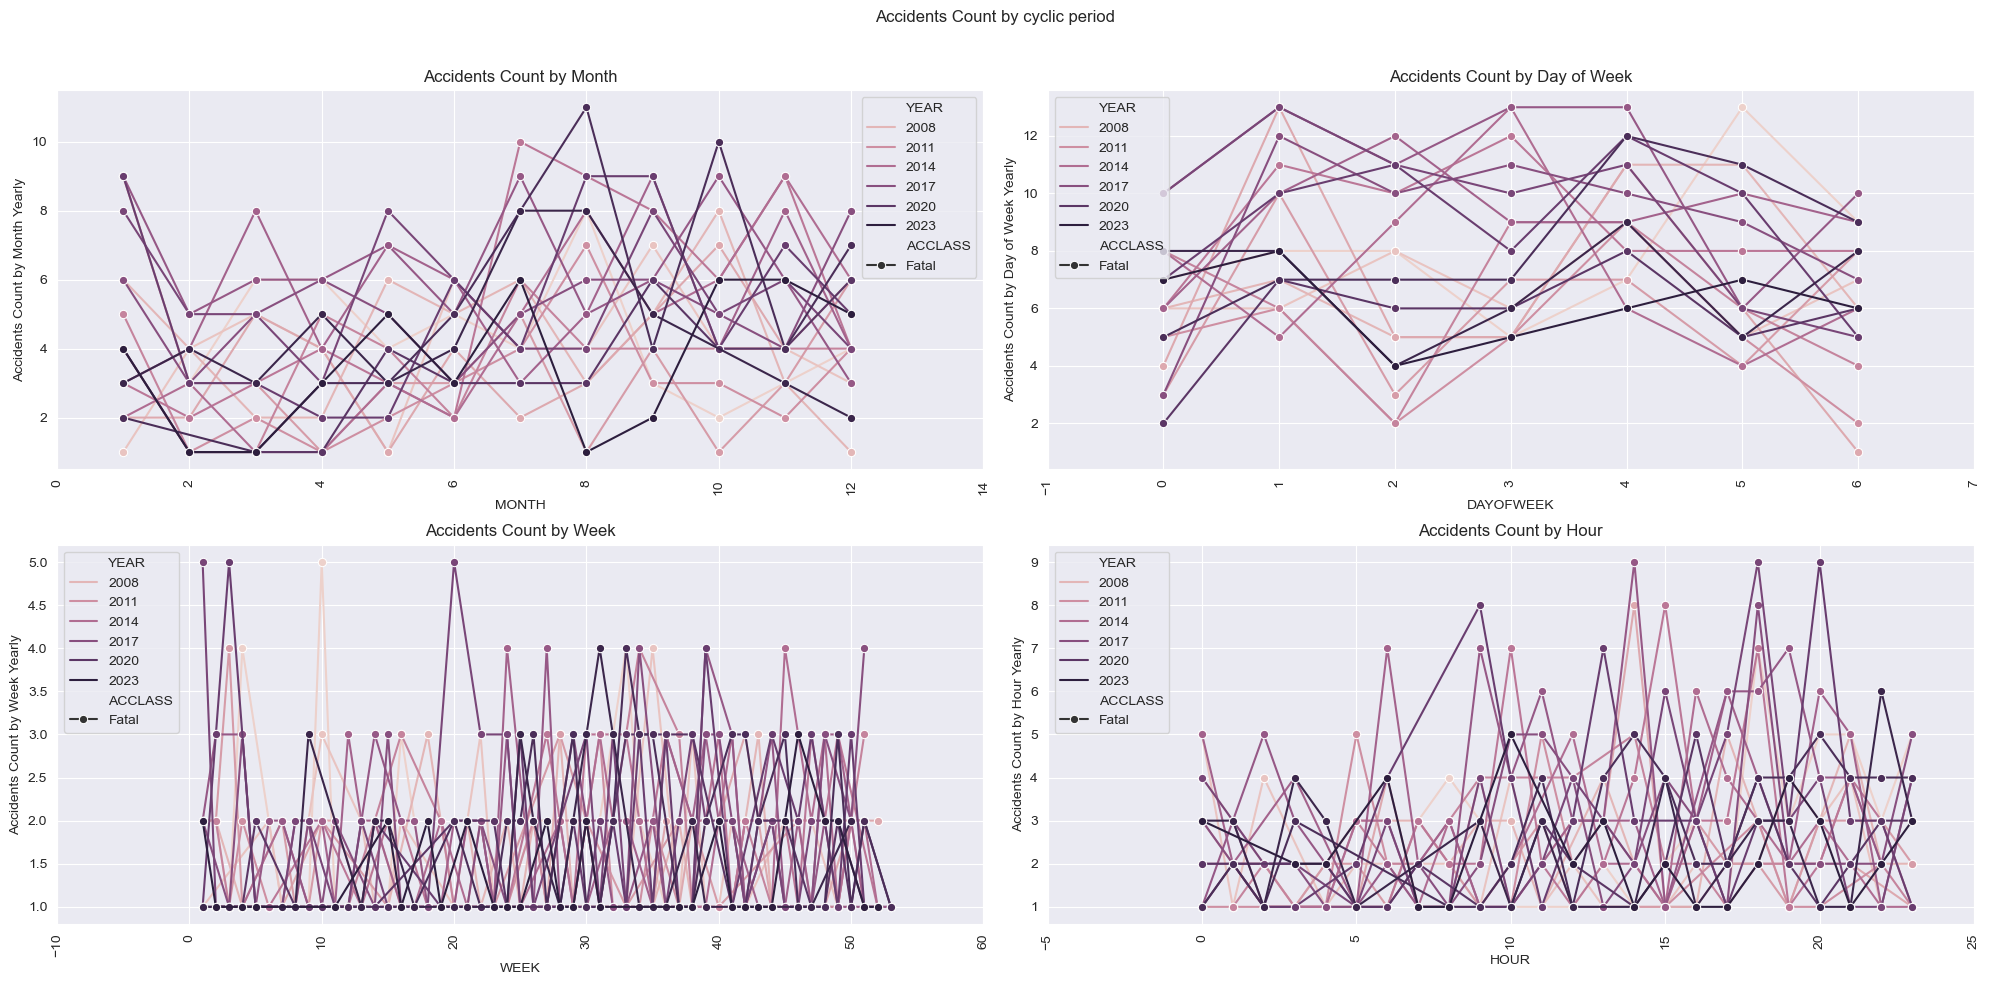

In [324]:
by_month = df_ksi.groupby(['MONTH', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Month')
by_dayofweek = df_ksi.groupby(['DAYOFWEEK', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Day of Week')
by_week = df_ksi.groupby(['WEEK', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Week')
by_hour = df_ksi.groupby(['HOUR', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Hour')

yearly_by_month = df_ksi.groupby(['YEAR','MONTH', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Month Yearly')
yearly_by_dayofweek = df_ksi.groupby(['YEAR','DAYOFWEEK', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Day of Week Yearly')
yearly_by_week = df_ksi.groupby(['YEAR','WEEK', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Week Yearly')
yearly_by_hour = df_ksi.groupby(['YEAR','HOUR', 'ACCLASS'])['ACCNUM'].nunique().reset_index(name = 'Accidents Count by Hour Yearly')

# Data and titles for each subplot
data1 = [by_month, by_dayofweek, by_week, by_hour]
data2 = [yearly_by_month, yearly_by_dayofweek, yearly_by_week, yearly_by_hour]
merge = ['MONTH', 'DAYOFWEEK', 'WEEK', 'HOUR']

data = []
for i,m in enumerate(merge):
    datatmp = pd.merge(data1[i], data2[i], on = [m, 'ACCLASS'])
    data.append(datatmp)
    # print(data1[i], data2[i], m)

# print(data)
titles = ['Accidents Count by Month', 'Accidents Count by Day of Week', 'Accidents Count by Week', 'Accidents Count by Hour']
xlabels = ['MONTH', 'DAYOFWEEK', 'WEEK', 'HOUR']
ylabels = ['Accidents Count by Month', 'Accidents Count by Day of Week', 'Accidents Count by Week', 'Accidents Count by Hour']
ylabels2 = ['Accidents Count by Month Yearly', 'Accidents Count by Day of Week Yearly', 'Accidents Count by Week Yearly', 'Accidents Count by Hour Yearly']

def plot_cycles(data, titles, xlabels, ylabels):
    fig, axes = plt.subplots(2,2, figsize = (20,10))
    fig.suptitle('Accidents Count by cyclic period')
    for i, ax in enumerate(axes.flat):
        sns.barplot(data = data[i], ax = ax, x = xlabels[i], y = ylabels[i], hue = 'ACCLASS')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        ax.set_title(titles[i])

        # sns.lineplot(data=data[i], ax = ax, x = xlabels[i], y = ylabels2[i], hue='YEAR', style='ACCLASS', markers=True)

    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

def plot_cycles2(data, titles, xlabels, ylabels):
    fig, axes = plt.subplots(2,2, figsize = (20,10))
    fig.suptitle('Accidents Count by cyclic period')
    for i, ax in enumerate(axes.flat):
        # sns.barplot(data = data[i], ax = ax, x = xlabels[i], y = ylabels[i], hue = 'ACCLASS')
        sns.lineplot(data=data[i], ax = ax, x = xlabels[i], y = ylabels2[i], hue='YEAR', style='ACCLASS', markers=True)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        ax.set_title(titles[i])



    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

filtered_fatal = 'Fatal'
by_month_filtered = by_month[by_month['ACCLASS'] == filtered_fatal]
by_dayofweek_filtered = by_dayofweek[by_dayofweek['ACCLASS'] == filtered_fatal]
by_week_filtered = by_week[by_week['ACCLASS'] == filtered_fatal]
by_hour_filtered = by_hour[by_hour['ACCLASS'] == filtered_fatal]
data_filtered = [by_month_filtered, by_dayofweek_filtered, by_week_filtered, by_hour_filtered]

data_filtered = [data[0][data[0]['ACCLASS'] == filtered_fatal],data[1][data[1]['ACCLASS'] == filtered_fatal],data[2][data[2]['ACCLASS'] == filtered_fatal],data[3][data[3]['ACCLASS'] == filtered_fatal],]
plot_cycles2(data, titles, xlabels, ylabels)
plot_cycles2(data_filtered, titles, xlabels, ylabels)
